### 1. Import libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

### 2. Loading data and data understanding

In [85]:
url = "https://raw.githubusercontent.com/htetaunglynn94/portfolio_projects/refs/heads/main/data/telecom_churn_data.csv"
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
df.shape

(7043, 21)

In [87]:
pd.set_option("display.max_columns", None)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
df = df.drop(columns="customerID")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [91]:
print(df.gender.unique())

['Female' 'Male']


In [92]:
print(df.SeniorCitizen.unique())

[0 1]


In [93]:
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
    if col not in numerical_features_list:
        print(f"{col}: {df[col].unique()}")
        print("-" * 50)

gender: ['Female' 'Male']
--------------------------------------------------
SeniorCitizen: [0 1]
--------------------------------------------------
Partner: ['Yes' 'No']
--------------------------------------------------
Dependents: ['No' 'Yes']
--------------------------------------------------
PhoneService: ['No' 'Yes']
--------------------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport: ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV: ['No' 'Yes' '

In [94]:
print(df.isna().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [95]:
len(df.query("TotalCharges == ' '"))

11

In [96]:
df.TotalCharges.replace({" ": 0.0}, inplace=True)

/tmp/ipython-input-2570019785.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TotalCharges.replace({" ": 0.0}, inplace=True)


In [97]:
df.TotalCharges = df.TotalCharges.astype('float')
df.TotalCharges.dtypes

dtype('float64')

In [98]:
print(df.Churn.value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Operation steps**
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0.0.
4. Class imbalance identified in the target

### 3. Exploratory Data Analysis

In [99]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Numerical features - analysis

**Histogram**

In [100]:
def plot_histogram(data, col_name):
    plt.figure(figsize=(5,3))
    sns.histplot(data[col_name], kde=True)
    plt.title(f"Distribution of [{col_name}] column")

    # Calculate mean and median values for each column
    mean_val = data[col_name].mean()
    median_val = data[col_name].median()

    # Add vertical lines for mean and median for each column
    plt.axvline(mean_val, color='red', ls='--', label="Mean")
    plt.axvline(median_val, color='green', ls='-', label="Median")
    plt.legend()
    plt.show()

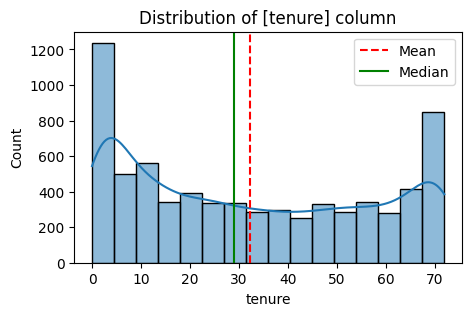

In [101]:
plot_histogram(df, "tenure")

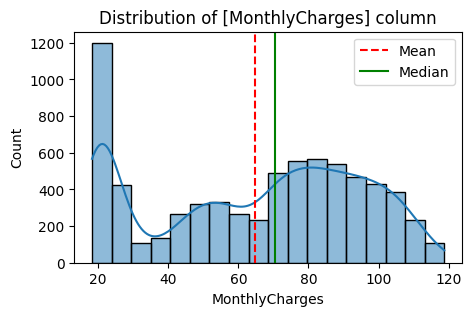

In [102]:
plot_histogram(df, "MonthlyCharges")

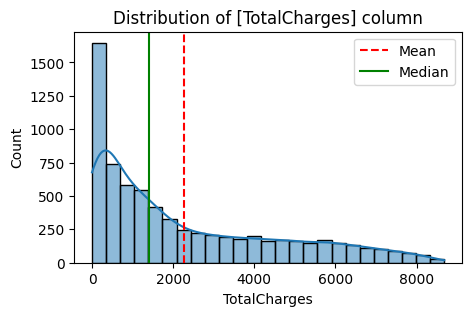

In [103]:
plot_histogram(df, "TotalCharges")

**Boxplot**

In [104]:
def plot_boxplot(df, col_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col_name])
    plt.title(f"Box plot of [{col_name}] column")
    plt.ylabel(col_name)
    plt.show()

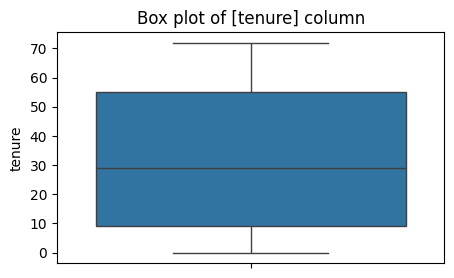

In [105]:
plot_boxplot(df, "tenure")

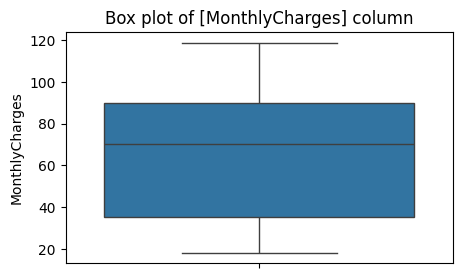

In [106]:
plot_boxplot(df, "MonthlyCharges")

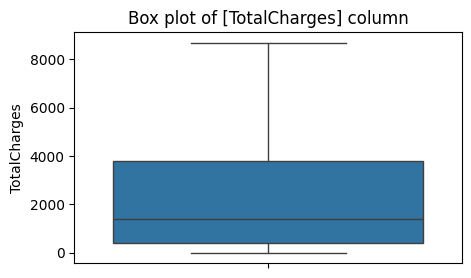

In [107]:
plot_boxplot(df, "TotalCharges")

__Correlation heatmap for numerical columns__

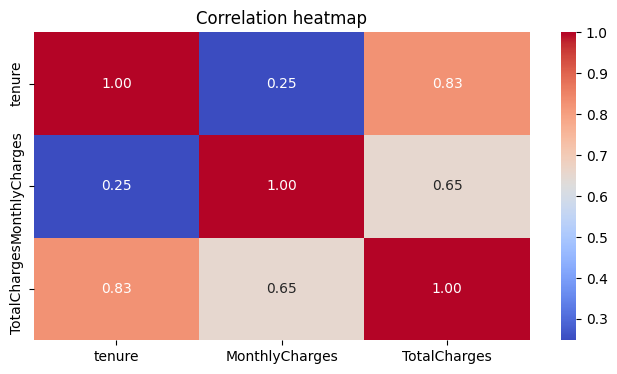

In [108]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation heatmap")
plt.show()

__Categorical features - Analysis__

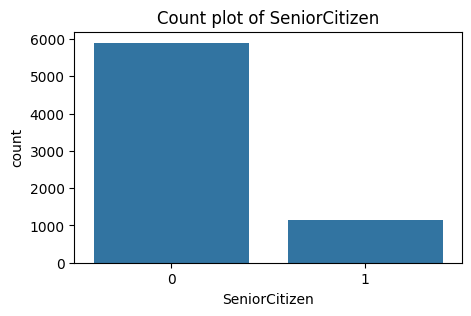

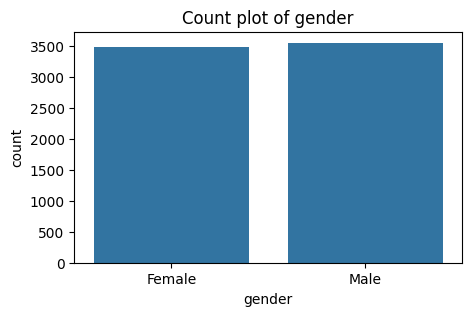

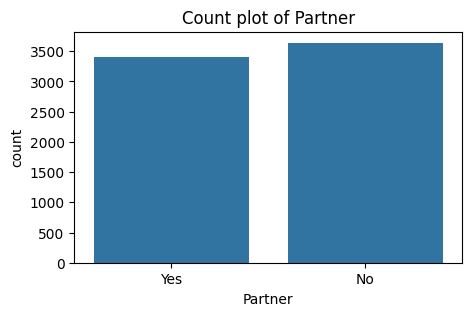

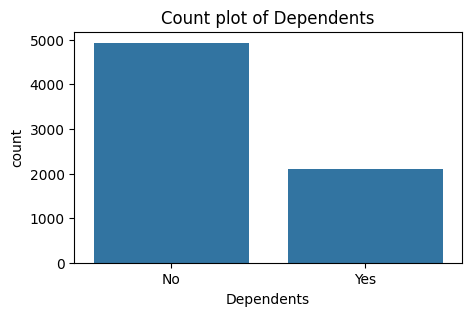

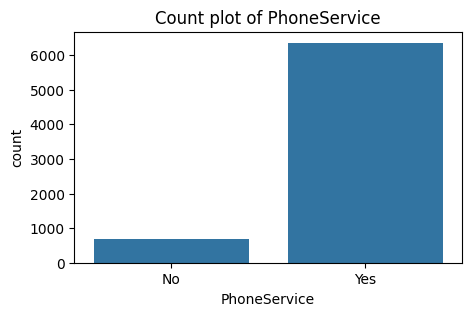

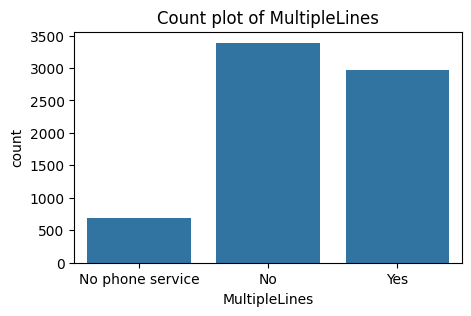

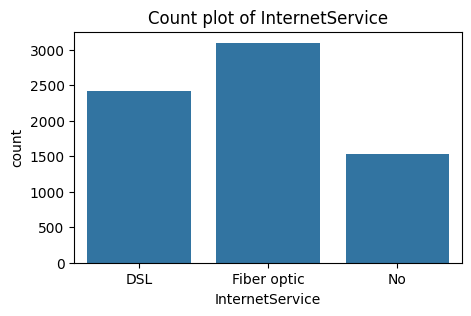

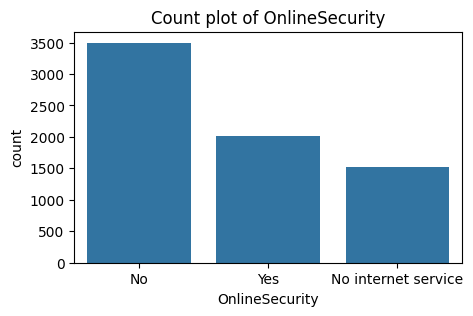

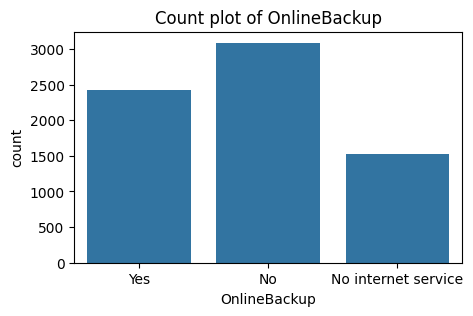

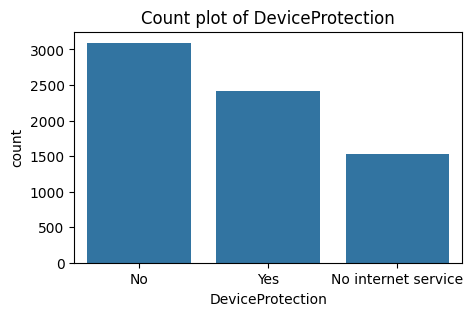

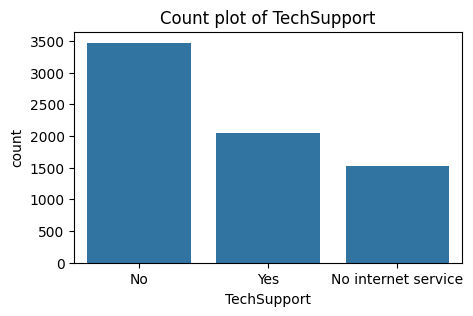

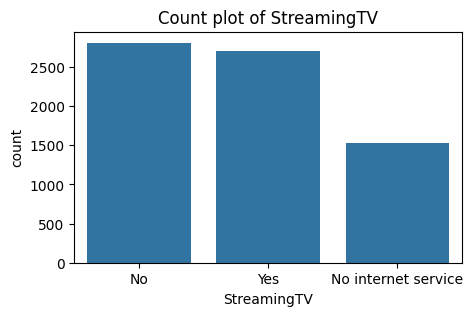

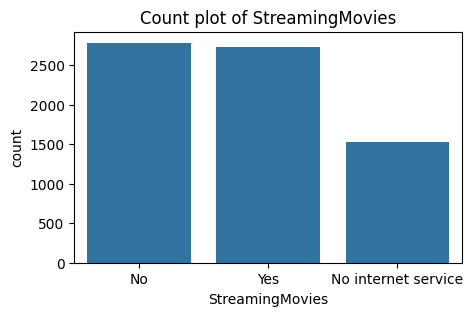

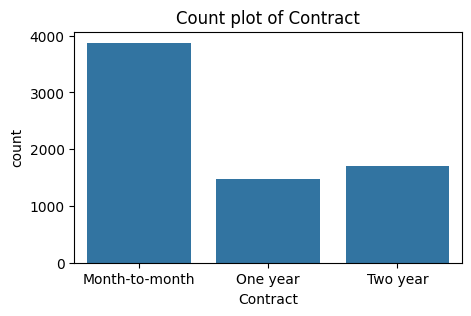

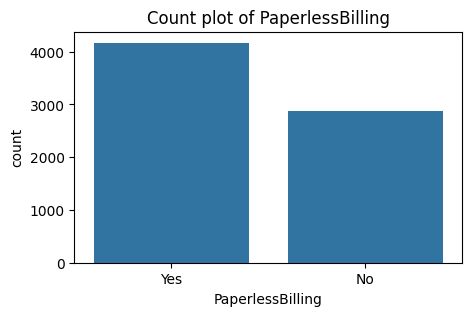

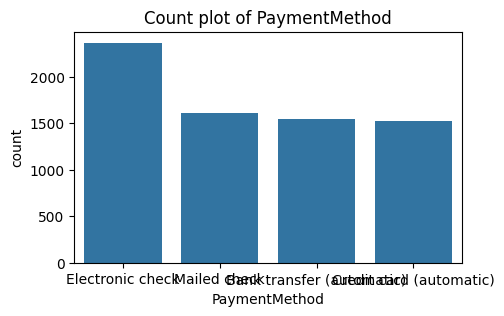

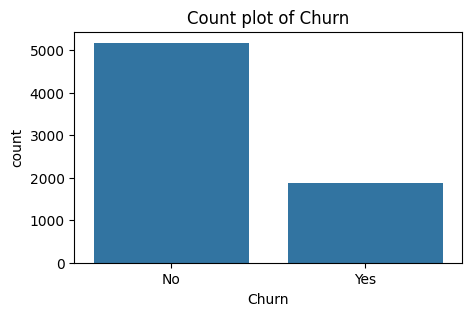

In [109]:
obj_cols = df.select_dtypes(include='object').columns.to_list()
obj_cols = ["SeniorCitizen"] + obj_cols # added new column at first place

for col in obj_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()

### 4. Data preprocessing

In [110]:
display(df.head(3))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


__Label encoding in target column, `Churn`__

In [111]:
df['Churn'] = df.Churn.replace({'Yes': 1, 'No': 0})
display(df.Churn.value_counts())

/tmp/ipython-input-2905587207.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df.Churn.replace({'Yes': 1, 'No': 0})


,count
Churn,
0,5174
1,1869


__Label encoding of categorical features__

In [112]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [113]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [114]:
# Initialize a dictionary to save the encoders
encoders = {}

# Apply label encoding and store the encoders
for col in obj_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder

display(encoders)
display(df[obj_cols].head())

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [115]:
# Save the encoders to a pickle file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

The purpose of saving `label_encoders.pkl` is that there may be another label encoding format in new data set. For example:

**old data**: `Yes`: 1 | `No`: 0  
**new data**: `Yes`: 0 | `No`: 1  

To be the same label encoding, saved as a pickle file.

__Test and test data splitting__

In [116]:
X = df.drop(columns="Churn")
y = df.Churn

In [117]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


In [118]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


__Sythetic Minority Oversampling TEchnique (SMOTE)__

In [119]:
smote = SMOTE(random_state=42)

In [120]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print(y_train_sm.shape)
print(y_train_sm.value_counts())

(8276,)
Churn
0    4138
1    4138
Name: count, dtype: int64


### 5. Model training

Train with default hyperparameters

In [122]:
# Model dictionary
models = {"Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42),
          "XGBoost": XGBClassifier(random_state=42)}

In [128]:
# Dictionary to store the cross validation results
cv_scores = {}

# Perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default hyperparameters.")
    scores = cross_val_score(model, X_train_sm, y_train_sm, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} | corss-validation accuracy: {np.mean(scores):.2f}")
    print("-" * 100)

Training Decision Tree with default hyperparameters.
Decision Tree | corss-validation accuracy: 0.78
----------------------------------------------------------------------------------------------------
Training Random Forest with default hyperparameters.
Random Forest | corss-validation accuracy: 0.84
----------------------------------------------------------------------------------------------------
Training XGBoost with default hyperparameters.
XGBoost | corss-validation accuracy: 0.83
----------------------------------------------------------------------------------------------------


In [129]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

`Random Forest` gives the highest accuracy compared to other models with default parameters.

In [130]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [135]:
y_test.value_counts()

,count
Churn,
0,1036
1,373


### 6. Model evaluation

In [134]:
# Evaluate on test data
y_test_pred = rfc.predict(X_test)
print("Accuracy score:-\n", accuracy_score(y_test, y_test_pred))
print("Confusion matrix:-\n", confusion_matrix(y_test, y_test_pred))
print("Classification report:-\n", classification_report(y_test, y_test_pred))

Accuracy score:-
 0.7785663591199432
Confusion matrix:-
 [[878 158]
 [154 219]]
Classification report:-
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [143]:
rfc.feature_names_in_, X.columns

(array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
        'TotalCharges'], dtype=object),
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges'],
       dtype='object'))

In [144]:
# Save the trained model as a pickle file
model_data = {"model": rfc, "feature_names": rfc.feature_names_in_}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

### 7. Load model and build predictive system

In [145]:
with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

model_data

{'model': RandomForestClassifier(random_state=42),
 'feature_names': array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
        'TotalCharges'], dtype=object)}

In [146]:
loaded_model = model_data["model"]
features_name = model_data["feature_names"]

In [147]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [148]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

In [151]:
input_data_df = pd.DataFrame([input_data])
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [152]:
with open("label_encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [154]:
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [158]:
prediction = loaded_model.predict(input_data_df)
pred_proba = loaded_model.predict_proba(input_data_df)
prediction

array([0])

In [159]:
print(f'Prediction: {"Churn" if prediction[0] == 1 else "No churn"}')
print(f"Prediciton probability: {pred_proba}")

Prediction: No churn
Prediciton probability: [[0.78 0.22]]


**To do:**
1. Implement Hyperparameter Tuining
2. Try Model Selection
3. Try downsampling
4. Try to address teh overfitting
5. Try Startified k fold CV